#Exploring PyPdf2

In [7]:
#install the dependencies
!pip install PyPDF2

source: https://www.youtube.com/watch?v=OdIHUdQ1-eQ&list=PLJ39kWiJXSiyEoVm8Ra5oRq3Xj6m1u5Me

resource: https://pypdf2.readthedocs.io/en/3.x/

## Task
* How to Exact text from PDF fie using PYPDF2
* How to merge and spit PDF fies
* How to get the last page of PDF
* How to Rotate PDF
* How to extract images from pdf
* How to extract tables from pdf
* How to convert image to pdf
* How to create pdf from text file
* How to Encrypt a PDF fle using PYPDF2
* How to add a watermark to a PDF fie



##List of Useful PDF Packages
- PyPdf
- fpdf
- pdfminer
- pdfblumber
-  img2pdf
- tabular
- camelot.py
- pdfiatex
- reportlab
- etc

In [8]:
#importing
import PyPDF2 as pdf

In [9]:
pdf.__version__

'3.0.1'

In [10]:
dir(pdf)

['DocumentInformation',
 'PageObject',
 'PageRange',
 'PaperSize',
 'PasswordType',
 'PdfFileMerger',
 'PdfFileReader',
 'PdfFileWriter',
 'PdfMerger',
 'PdfReader',
 'PdfWriter',
 'Transformation',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_cmap',
 '_codecs',
 '_encryption',
 '_merger',
 '_page',
 '_protocols',
 '_reader',
 '_security',
 '_utils',
 '_version',
 '_writer',
 'constants',
 'errors',
 'filters',
 'generic',
 'pagerange',
 'papersizes',
 'parse_filename_page_ranges',
 'types',
 'warnings',
 'xmp']

## Working

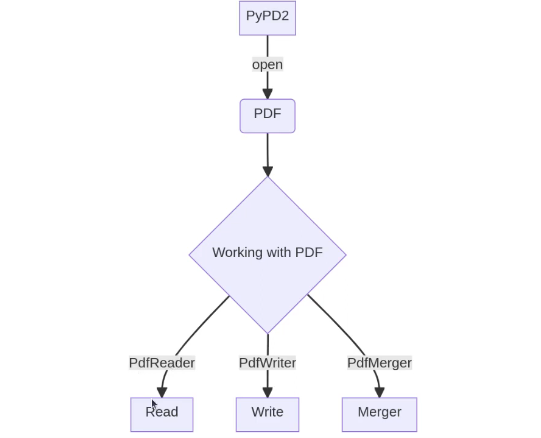

In [11]:
from PyPDF2 import PdfReader, PdfWriter

In [12]:
# Get Info of Open PDF File
file = open("Nativity_Example.pdf","rb")
reader = PdfReader(file)

In [13]:
#reader.getDocumentInfo()

In [14]:
# Get the Title of the PDF Document
# prev reader.getDocumentInfo
info = reader.metadata

In [15]:
info

{'/Title': 'Nativity_Example',
 '/Producer': 'Skia/PDF m110 Google Docs Renderer'}

In [16]:
#get title
info.title

'Nativity_Example'

In [17]:
#get the author
info.author

In [18]:
#number of pages of pdf
len(reader.pages)

3

In [19]:
#how to extract text file
# prev: reader.pages[0].extractText()
reader.pages[0].extract_text()

'The nativity of Jesus, nativity of Christ, birth of Jesus or birth of Christ is described in the biblical\ngospels of Luke and Matthew . The two accounts agree that Jesus was born in Bethlehem in\nJudaea, his mother Mary was engaged to a man named Joseph, who was descended from King\nDavid and was not his biological father , and that his birth was caused by divine intervention.\nMany modern scholars consider the birth narratives unhistorical because they are laced with\ntheology and present two dif ferent accounts which cannot be harmonised into a single coherent\nnarrative. But many others view the discussion of historicity as secondary , given that gospels\nwere primarily written as theological documents rather than chronological timelines.\nThe nativity is the basis for the Christian holiday of Christmas, and plays a major role in the\nChristian liturgical year . Many Christians traditionally display small manger scenes depicting the\nnativity in their homes, or attend nativity pla

In [20]:
# A function to get metadata
def get_metadata(pdf_path):
  with open(pdf_path, "rb") as file:
    reader = PdfReader(file)
    info = reader.metadata
    return info

In [21]:
get_metadata("Nativity_Example.pdf")

{'/Title': 'Nativity_Example',
 '/Producer': 'Skia/PDF m110 Google Docs Renderer'}

In [22]:
#function to extract a text from pdf
def extract_text_from_pdf(pdf_path):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    result = []
    for i in range(0, len(reader.pages)):
      page = reader.pages[i]
      text = page.extract_text()
      result.append(text)
    return' '.join(result)

In [23]:
extract_text_from_pdf("Nativity_Example.pdf")

'The nativity of Jesus, nativity of Christ, birth of Jesus or birth of Christ is described in the biblical\ngospels of Luke and Matthew . The two accounts agree that Jesus was born in Bethlehem in\nJudaea, his mother Mary was engaged to a man named Joseph, who was descended from King\nDavid and was not his biological father , and that his birth was caused by divine intervention.\nMany modern scholars consider the birth narratives unhistorical because they are laced with\ntheology and present two dif ferent accounts which cannot be harmonised into a single coherent\nnarrative. But many others view the discussion of historicity as secondary , given that gospels\nwere primarily written as theological documents rather than chronological timelines.\nThe nativity is the basis for the Christian holiday of Christmas, and plays a major role in the\nChristian liturgical year . Many Christians traditionally display small manger scenes depicting the\nnativity in their homes, or attend nativity pla

## How to Split PDFs
- Split into multiple pdfs
- Split off the last page
- Get PDF upto a Particular Page

In [24]:
import os

In [25]:
#pdfwriter
#funtion to split pdf into multiple pdf pages
def split_pdf(pdf_path):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    #get all pages
    for page_num in range(0, len(reader.pages)):
      #loop through pages
      page = reader.pages[page_num]
      #initiate writer to write (imp position)
      writer = PdfWriter()
      writer.add_page(page) #add or embedded page
      filename = os.path.splitext(pdf_path)[0]
      output_filename = f'(filename){page_num+1}.pdf'
      #save and compile pdf
      with open(output_filename, 'wb') as output_file:
        writer.add_page(page)
        writer.write(output_file)
      writer.add_page(page)
      print('created a pdf:{}'.format(output_filename))


In [26]:
split_pdf("Nativity_Example.pdf")

created a pdf:(filename)1.pdf
created a pdf:(filename)2.pdf
created a pdf:(filename)3.pdf


In [27]:
#split pdf to a page
#same as before code only the position of writer changes
def get_pdf_upto(pdf_path, start_page:int=0,stop_page:int=0, output_path='output'):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    #position of writer changed
    writer = PdfWriter()
    for page_num in range(start_page, stop_page):
      selected_page = reader.pages[page_num]
      writer.add_page(selected_page)
    output_filename = os.path.join(output_path, f'page_{start_page}-{stop_page}.pdf')
    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)
    with open(output_filename, 'wb') as output_file:
      writer.write(output_file)
    print('created a pdf:{}'.format(output_filename))

In [28]:
#or
def get_pdf_upto(pdf_path, start_page:int=0,stop_page:int=0, output_path='output'):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    writer = PdfWriter()
    for page_num in range(start_page, stop_page):
      selected_page = reader.pages[page_num]
      writer.add_page(selected_page)
      filename = os.path.splitext(pdf_path)[0]
      output_filename = f'{filename} from {start_page} to {stop_page}.pdf'
    with open(output_filename, 'wb') as output_file:
      writer.write(output_file)

In [29]:
#optimized version of get_pdf_upto
def get_pdf_upto(pdf_path, start_page:int=0, stop_page:int=0, output_path='output'):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    writer = PdfWriter()
    for page_num in range(start_page, stop_page):
      writer.add_page(reader.pages[page_num])

    filename = os.path.splitext(pdf_path)[0]
    output_filename = f'{filename} from {start_page} to {stop_page}.pdf'

    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)
    full_output_path = os.path.join(output_path, output_filename)

    with open(full_output_path, 'wb') as output_file:
      writer.write(output_file)
    print(f'Created a pdf: {full_output_path}')

In [30]:
get_pdf_upto("Nativity_Example.pdf", 0, 1)

Created a pdf: output/Nativity_Example from 0 to 1.pdf


In [31]:
# How to get last page
def get_last_page(pdf_path):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    #last_page = reader.pages[-1]
    #last_page = len(reader.page)-1
    writer = PdfWriter()
    selected_pages = reader.pages[len(reader.pages)-1] #instead of 'last_page'
    writer.add_page(selected_pages)
    filename = os.path.splitext(pdf_path)[0]
    output_filename = f'{filename} last page.pdf'
    with open(output_filename, 'wb') as output_file:
      writer.write(output_file)


In [32]:
get_last_page("Nativity_Example.pdf")

## Mergiing pdf
+ get a list
+ pdfMerger

In [33]:
def fetch_all_files(parent_folder:str):
  target_files = []
  for path, subdirs, files in os.walk(parent_folder):
    for name in files:
      if name.endswith('.pdf'):
        target_files.append(os.path.join(path, name))
  return target_files

In [34]:
fetch_all_files('./Out')

[]

In [35]:
#Merger
from PyPDF2 import PdfMerger

In [36]:
def merge_pdf(list_od_pdfs, output_filename = 'final_merged_file.pdf'):
  merger = PdfMerger()
  with open(output_filename, 'wb') as f:
    for pdf in list_od_pdfs:
      merger.append(pdf)
    merger.write(f)

In [37]:
pdf_list = fetch_all_files('./Out')

In [38]:
merge_pdf(pdf_list)

## How to rotate a pdf page

In [50]:
def rotate_pdf(pdf_path, page_num: int, rotation: int=90):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    writer = PdfWriter()
    writer.add_page(reader.pages[page_num])
    #rotation
    writer.pages[page_num].rotate(rotation)
    filename = os.path.splitext(pdf_path)[0]
    output_filename = f'{filename} {rotation}_rotated_page.pdf'
    with open(output_filename, 'wb') as out:
      writer.write(out)
    print('rotated page')

In [52]:
rotate_pdf("Nativity_Example last page.pdf", 0)

rotated page


## How to convert image into pdf

In [53]:
from PyPDF2 import PdfReader


In [55]:
def extract_images_from_pdf(pdf_path):
  with open(pdf_path, 'rb') as f:
    reader = PdfReader(f)
    for page_num in range(len(reader.pages)):
      page = reader.pages[page_num]
      for img_file_obj in page.images:
        with open(img_file_obj.name, 'wb') as out:
          out.write(img_file_obj.data)
      """
      images = page.images
      for image_index, image in enumerate(images):
        image_data = image.data
        with open(f'image_{page_num}_{image_index}.png', 'wb') as f:
          f.write(image_data)
      """

In [56]:
extract_images_from_pdf('ML_Wiki.pdf')

## convert image to pdf

In [57]:
from PIL import  Image

In [58]:
def convert_img_to_pdf(image_file):
  my_image = Image.open(image_file)
  img = my_image.convert('RGB')
  filename = os.path.splitext(image_file)[0]
  output_filename = f'{filename}.pdf'
  #or
  #filename = f'{os.path.splitext(image_file)[0]}.pdf'
  img.save(output_filename, 'PDF', resolution=100.0)

In [59]:
convert_img_to_pdf('X5.png')